In [ ]:
%matplotlib inline
from glob import glob
import cv2
import PIL
import tqdm
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import datasets
from skimage.filters import gabor
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops

In [ ]:
X = pd.read_pickle('https://github.com/SangeerthanaBalasubramaniam/COVID-19-Diagnosis/blob/main/covidFeatures.pckl?raw=true')
Y = pd.read_pickle('https://github.com/SangeerthanaBalasubramaniam/COVID-19-Diagnosis/blob/main/covidLable.pckl?raw=true')
X = pd.DataFrame(X,columns=['lbp_energy','lbp_entropy','glcm_contrast','glcm_dissimilarity','glcm_homogeniety','glcm_energy','glcm_correlation','gabor_energy','gabor_entropy'])
Y = pd.DataFrame(Y,columns=['labels'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/semester_projects/Machine Learning/Dataset/

/content/drive/.shortcut-targets-by-id/1KWxsKIHsfr4Jg0ERoTDt4kBW08DTNbnF/semester_projects/Machine Learning/Dataset


In [ ]:
#define size to which images are to be resized
IMAGE_SIZE = [200, 200] # feel free to change depending on dataset

# training config:
epochs = 500
batch_size = 32

#define paths
covid_path = 'COVID'
noncovid_path = 'non-COVID'

# Use glob to grab images from path .jpg or jpeg
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

In [ ]:
print("First 5 Covid Files: ",covid_files[0:5])
print("Total Count: ",len(covid_files))
print("First 5 NonCovid Files: ",noncovid_files[0:5])
print("Total Count: ",len(noncovid_files))

First 5 Covid Files:  ['COVID/Covid (229).png', 'COVID/Covid (237).png', 'COVID/Covid (1251).png', 'COVID/Covid (182).png', 'COVID/Covid (262).png']
Total Count:  1252
First 5 NonCovid Files:  ['non-COVID/Non-Covid (1161).png', 'non-COVID/Non-Covid (1103).png', 'non-COVID/Non-Covid (1027).png', 'non-COVID/Non-Covid (1038).png', 'non-COVID/Non-Covid (123).png']
Total Count:  1229


In [ ]:
#lables generation
covid_labels = []
noncovid_labels = []
for i in range(len(covid_files)):
  covid_labels.append("covid")
for i in range(len(covid_files)):
  noncovid_labels.append("noncovid")

In [ ]:
files = covid_files + noncovid_files
lables = covid_labels + noncovid_labels
df = pd.DataFrame(list(zip(files, lables)),columns =['Files', 'Lables'])
df = df.sample(frac=1, random_state=42) #shuffle dataset

In [ ]:
df.head()

,Files,Lables
254,COVID/Covid (321).png,covid
621,COVID/Covid (587).png,covid
1730,non-COVID/Non-Covid (638).png,noncovid
1792,non-COVID/Non-Covid (594).png,noncovid
819,COVID/Covid (811).png,covid


COVID/Covid (229).png


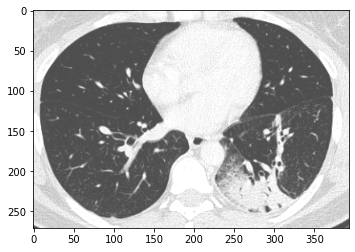

In [ ]:
print(df["Files"][0])
image = cv2.imread(df["Files"][0])
plt.imshow(image)

COVID/Covid (229).png


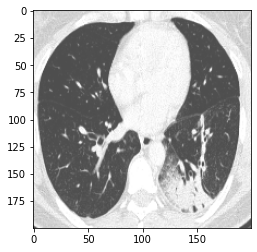

In [ ]:
# Resizing
import cv2
import matplotlib.pyplot as plt
IMAGE_SIZE = [200, 200]

print(df["Files"][0])
image = cv2.imread(df["Files"][0])
plt.imshow(image)

In [ ]:
image = cv2.resize(image,(IMAGE_SIZE[0],IMAGE_SIZE[1]))
plt.imshow(image)

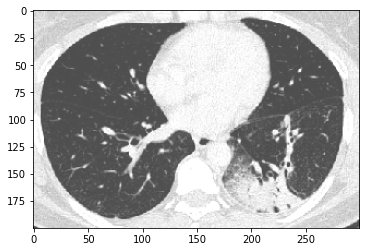

In [ ]:
# Interpolation 
image = cv2.imread(df["Files"][0])
image = cv2.resize(image,(300,200),interpolation=cv2.INTER_LINEAR)
plt.imshow(image)

COVID/Covid (229).png


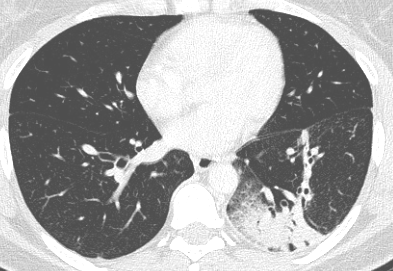

In [ ]:
# Converting to grayscale
from google.colab.patches import cv2_imshow
print(df["Files"][0])
image = cv2.imread(df["Files"][0])
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

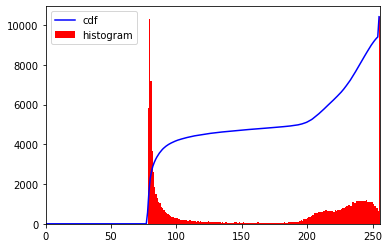

In [ ]:
# Histogram equalization
from google.colab.patches import cv2_imshow
image = cv2.imread(df["Files"][0],0)

hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

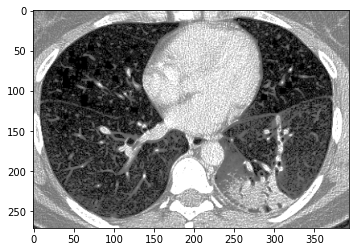

In [ ]:
dst = cv2.equalizeHist(image)
plt.imshow(dst, cmap="gray", vmin=0, vmax=255)

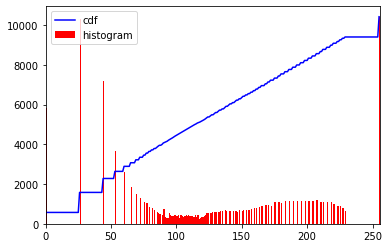

In [ ]:
hist,bins = np.histogram(dst.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(dst.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

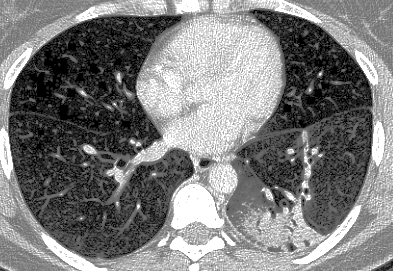

In [ ]:
# Histogram equalization
from google.colab.patches import cv2_imshow
image = cv2.imread(df["Files"][0],0)
dst = cv2.equalizeHist(image)
cv2_imshow(dst)

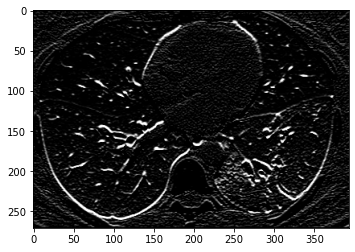

In [ ]:
# Convolution
img = cv2.imread(df["Files"][0])
filter_matrix = np.array([[-1,-2,-1], [0,0,0], [1, 2, 1]])
dst = cv2.filter2D(img,-1, filter_matrix)
plt.imshow(dst)

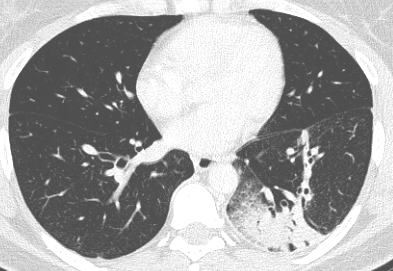

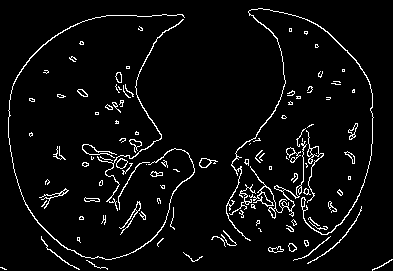

In [ ]:
# Edge Detection
import cv2
from google.colab.patches import cv2_imshow

#n = len(Files)
for i in range(1):
  img = cv2.imread(df['Files'][i]) 
  cv2_imshow(img)

  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

  edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
  cv2_imshow(edges)

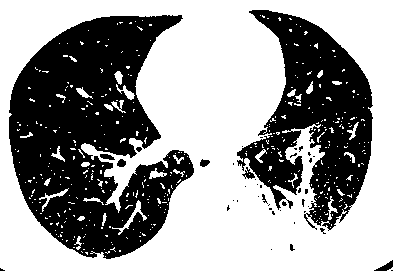

In [ ]:
img = cv2.imread(df["Files"][0])
ret, thresh_image = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
cv2_imshow(thresh_image)